In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv('Data/fabrizioromanoherewego.csv')

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        110 non-null    int64  
 1   text                           110 non-null    object 
 2   post_text                      110 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           110 non-null    object 
 6   timestamp                      110 non-null    int64  
 7   image                          105 non-null    object 
 8   image_lowquality               110 non-null    object 
 9   images                         110 non-null    object 
 10  images_description             110 non-null    object 
 11  images_lowquality              110 non-null    object 
 12  images_lowquality_description  110 non-null    obj

In [5]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [6]:
reactions

{'like': 3711,
 'love': 291,
 'haha': 16,
 'wow': 11,
 'care': 33,
 'sad': 109,
 'shares': 8,
 'comments': 171}

Reaction Analysis

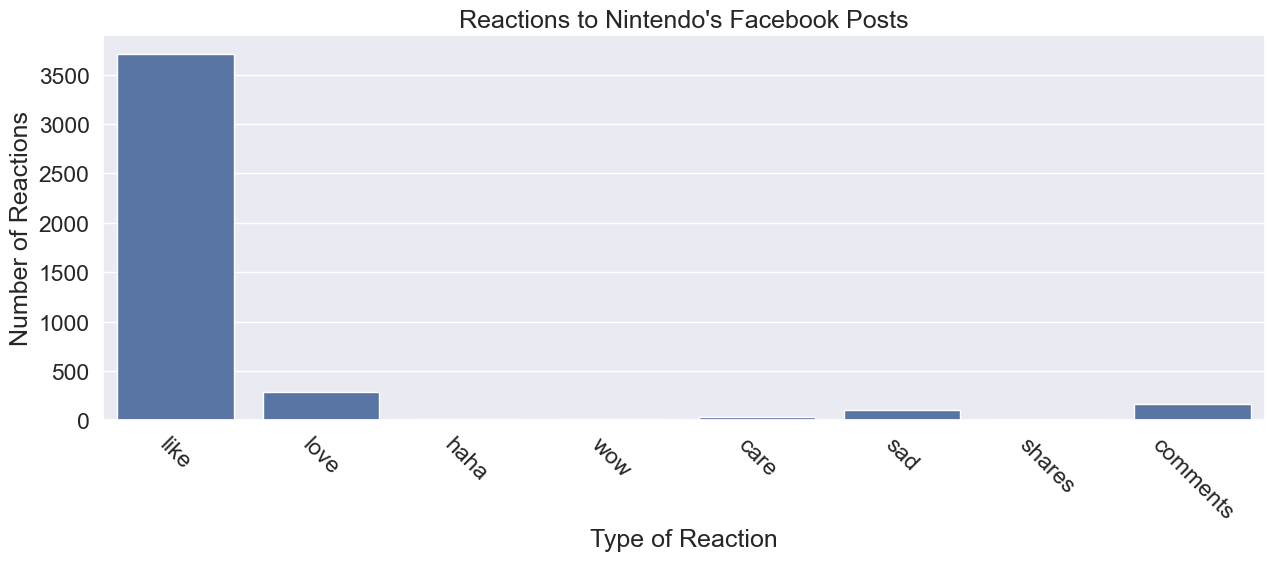

In [7]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Fabrizio Romano's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()